# Classification with Agricultural Data

## Customary imports, and import of the Dataset

In [1]:
# Customary imports 1
import numpy as np
import pandas as pd
import torch

In [2]:
# Customary imports 2
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Import the complete dataframe from the csv file
df = pd.read_csv("Crop_recommendation.csv")
# 
# df.shape

# batch_size = 64
target = pd.DataFrame(df['label'].astype('category').cat.codes)
del df['label']
dataset_1 = torch.utils.data.TensorDataset(torch.Tensor(np.array(df)), torch.Tensor(np.array(target)).type(torch.LongTensor))
train_loader_1 = torch.utils.data.DataLoader(dataset_1, batch_size = 128, shuffle = False)  # NOTE: If you shuffle you'll lose the temporal correlation


## Your Model is to Begin Here!

### (a) Since this is a multi label classification, thus the softmax classification model is suitable for such an application. Cross-entropy loss is used to measure the performance of this model. Rectified Linear Unit (RELU) is applied after each layor.

In [13]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(7, 128)
        # self.l2 = torch.nn.Linear(256, 128)
        self.l3 = torch.nn.Linear(128, 64)
        self.l4 = torch.nn.Linear(64, 32)
        self.l5 = torch.nn.Linear(32, 22)

    def forward(self, x):
        x = torch.relu(self.l1(x))
        # x = torch.relu(self.l2(x))
        x = torch.relu(self.l3(x))
        x = torch.relu(self.l4(x))
        return self.l5(x)

epoch: 1 loss: 2.521
epoch: 2 loss: 2.432
epoch: 3 loss: 2.510
epoch: 4 loss: 2.418
epoch: 5 loss: 2.416
epoch: 6 loss: 2.218
epoch: 7 loss: 2.135
epoch: 8 loss: 1.926
epoch: 9 loss: 1.741
epoch: 10 loss: 1.571
epoch: 11 loss: 1.402
epoch: 12 loss: 1.296
epoch: 13 loss: 1.195
epoch: 14 loss: 1.061
epoch: 15 loss: 0.960
epoch: 16 loss: 0.874
epoch: 17 loss: 0.871
epoch: 18 loss: 0.805
epoch: 19 loss: 0.786
epoch: 20 loss: 0.659
epoch: 21 loss: 0.583
epoch: 22 loss: 0.565
epoch: 23 loss: 0.444
epoch: 24 loss: 0.401
epoch: 25 loss: 0.346
epoch: 26 loss: 0.300
epoch: 27 loss: 0.248
epoch: 28 loss: 0.194
epoch: 29 loss: 0.154
epoch: 30 loss: 0.129
epoch: 31 loss: 0.105
epoch: 32 loss: 0.093
epoch: 33 loss: 0.082
epoch: 34 loss: 0.065
epoch: 35 loss: 0.058
epoch: 36 loss: 0.054
epoch: 37 loss: 0.057
epoch: 38 loss: 0.058
epoch: 39 loss: 0.063
epoch: 40 loss: 0.064
epoch: 41 loss: 0.064
epoch: 42 loss: 0.070
epoch: 43 loss: 0.068
epoch: 44 loss: 0.072
epoch: 45 loss: 0.065
epoch: 46 loss: 0.0

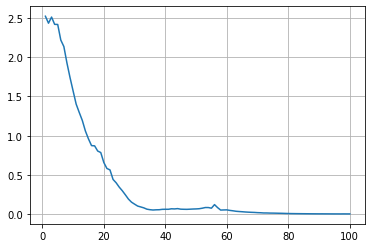

In [19]:
model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)
criterion = torch.nn.CrossEntropyLoss()

epochs = []
losses = []

if __name__ == '__main__':
    for epoch in range(100):
        # print(epoch)
        for i, data in enumerate(train_loader_1, 0):
            inputs, label = data
            label = label.view(-1)
            output = model(inputs)
            loss = criterion(output, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        epochs.append(epoch+1)
        losses.append(loss.item())
        print('epoch: %d loss: %.3f' % (epoch+1, loss.item()))

plt.plot(epochs,losses)
plt.grid()
plt.show()

### (c) As shown in figure, the performance of my model is pretty good. The loss decreases eexponentially. 